# AML Classification Challenge 1


## Introduction

The following notebook creates a model that can classify between **normal operation (no fault)** and **faulty operation (missing tooth)** at the same speed and load. **80%** of the data has been used for training, and **20%** has been used for validation. The **confusion matrix** has also been plotted at the end.

## Packages 
The following packages have been used during this assignment,
- [tensorflow](https://www.tensorflow.org/) - Machine learning.
- [numpy](https://numpy.org/) - Scientific computing with Python.
- [matplotlib](http://matplotlib.org) - Plot graphs in Python.
- [pandas](https://pandas.pydata.org) - Data manipulation and analysis.
- [sklearn](https://scikit-learn.org) - Predictive data analysis.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Dataset

In [2]:
# Load the data from CSV files
faulty_data = pd.read_csv('data/missing_tooth.csv')
normal_data = pd.read_csv('data/no_fault.csv')

# Create a label column to indicate faulty (1) or normal (0)
faulty_data['label'] = 1
normal_data['label'] = 0

# Concatenate the dataframes
data = pd.concat([faulty_data, normal_data], ignore_index=True)

In [3]:
#Size window to cover maximum 1 second
window_size = pd.Timedelta(seconds=1)

# Sort the DataFrame by the time_x column
data = data.sort_values('time_x')

# Convert 'time_x' column to datetime
data['time_x'] = pd.to_datetime(data['time_x'])

# Group the data into windows of 1 second
windowed_data = data.groupby([pd.Grouper(key='time_x', freq=window_size)]).apply(lambda x: x).reset_index(drop=True)

In [4]:
# Select the relevant columns for training
features = ['sensor1', 'sensor2']
labels = ['label']
data = windowed_data[features + labels]

In [5]:
# Normalize the features
data.loc[:, features] = (data[features] - data[features].mean()) / data[features].std()

In [6]:
# Split the data into features and labels
X = data[features].values
y = data[labels].values

In [7]:
#split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)

print("Shape of X_train:",X_train.shape)
#print("Shape of X_val:",X_val.shape[0])
print("Shape of y_train:",y_train.shape)
#print("Shape of y_val:",y_val.shape[0])

Shape of X_train: (240000, 2)
Shape of y_train: (240000, 1)


## Training the Model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(len(features),)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Print the model summary
model.summary()

#Select the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

#Compile the model
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 513
Trainable params: 385
Non-trainable params: 128
_________________________________________________________________


In [9]:
#training the model
batch_size = 64
epochs = 10
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
3750/3750 [==============================] - 12s 3ms/step - loss: 0.6654 - accuracy: 0.5971 - val_loss: 0.6616 - val_accuracy: 0.6013
Epoch 2/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6624 - accuracy: 0.6013 - val_loss: 0.6616 - val_accuracy: 0.6033
Epoch 3/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6618 - accuracy: 0.6017 - val_loss: 0.6606 - val_accuracy: 0.6076
Epoch 4/10
3750/3750 [==============================] - 9s 3ms/step - loss: 0.6615 - accuracy: 0.6025 - val_loss: 0.6603 - val_accuracy: 0.6059
Epoch 5/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6607 - accuracy: 0.6031 - val_loss: 0.6581 - val_accuracy: 0.6038
Epoch 6/10
3750/3750 [==============================] - 9s 2ms/step - loss: 0.6598 - accuracy: 0.6045 - val_loss: 0.6580 - val_accuracy: 0.6018
Epoch 7/10
3750/3750 [==============================] - 10s 3ms/step - loss: 0.6598 - accuracy: 0.6033 - val_loss: 0.6566 - val_accurac

In [10]:
# Predict probabilities for validation data
y_pred_prob = model.predict(X_val)

# Round probabilities to obtain predicted classes
y_pred = np.round(y_pred_prob).astype(int)


1875/1875 [==============================] - 3s 1ms/step


## Confusion Matrix

In [11]:
# Generate confusion matrix
cm = confusion_matrix(y_val, y_pred)

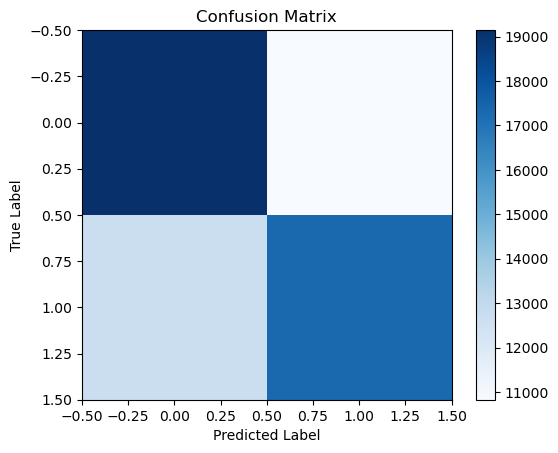

In [12]:
# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()